# Q1

201.79499999999993 253.68399999999994
30.234018505650567 46.55699028073037
0.13316806883249083


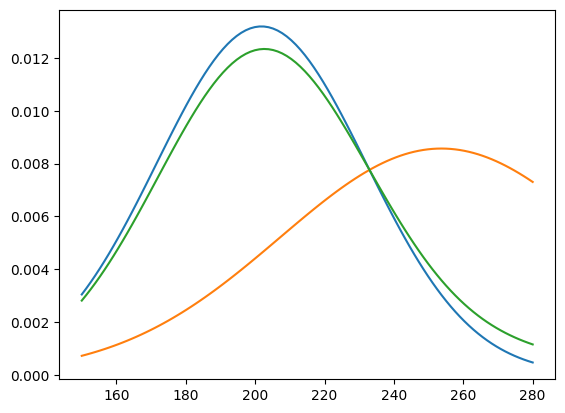

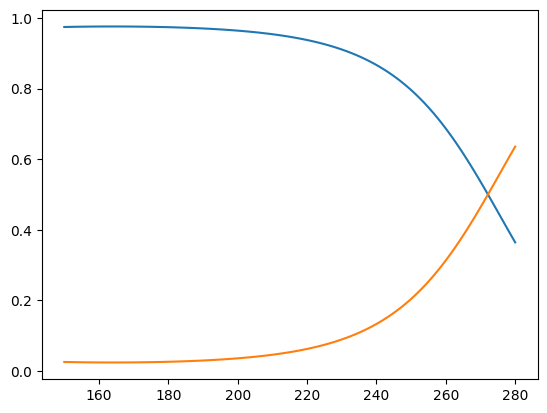

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/womue/s1.csv")
x = df['x']
y = df['y']

#Continue here...
mean0 = np.sum(x[y==0])/np.count_nonzero(y==0)
mean1 = np.sum(x[y==1])/np.count_nonzero(y==1)

print(mean0,mean1)

std0 = np.sqrt(np.sum(x[y==0]**2)/np.count_nonzero(y==0)- mean0**2)
std1 = np.sqrt(np.sum(x[y==1]**2)/np.count_nonzero(y==1)- mean1**2)

print(std0, std1)

pw0 = 0.9
pw1 = 0.1

x_samp = np.linspace(150,280,100)
pxw0 = 1/np.sqrt(2*np.pi)/std0*np.exp(-((x_samp-mean0)/std0)**2/2)
pxw1 = 1/np.sqrt(2*np.pi)/std1*np.exp(-((x_samp-mean1)/std1)**2/2)

px = pxw0*pw0 + pxw1*pw1

pw0x = pxw0*pw0/px
pw1x = pxw1*pw1/px

fig, ax = plt.subplots()
ax.plot(x_samp,pxw0)
ax.plot(x_samp,pxw1)
ax.plot(x_samp,px)

fig, ax = plt.subplots()
ax.plot(x_samp,pw0x)
ax.plot(x_samp,pw1x)

#now get out the value at 240. Rather than recalculate we just interpolate the function - should be pretty accurate
print(np.interp(240,x_samp,pw1x))

# Q2

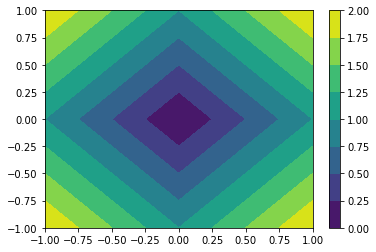

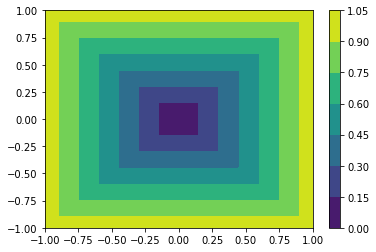

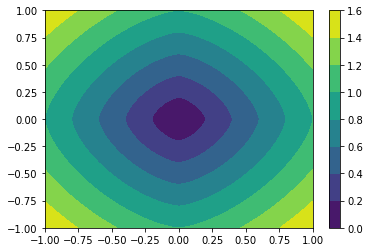

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#This function may be useful to define the sampling grid for this question
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

#Continue here...
Xgrid,x1line,x2line = gen_sample_grid()

#print(Xgrid.shape)
#print((np.abs(Xgrid[:,0])+np.abs(Xgrid[:,1])).shape)
L1 = np.reshape(np.abs(Xgrid[:,0])+np.abs(Xgrid[:,1]),[200,200])
Linf = np.reshape(np.max(np.abs(Xgrid),axis=1),[200,200])
n = 1.5
L1p5 = np.reshape(np.power(np.power(np.abs(Xgrid[:,0]),n)+np.power(np.abs(Xgrid[:,1]),n),1/n),[200,200])

fig, ax = plt.subplots()
plt.contourf(x1line,x2line,L1)
plt.colorbar()


fig, ax = plt.subplots()
plt.contourf(x1line,x2line,Linf)
plt.colorbar()

fig, ax = plt.subplots()
plt.contourf(x1line,x2line,L1p5)
plt.colorbar()




# Q3 (a)

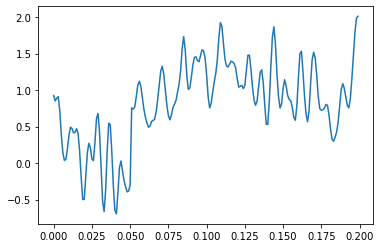

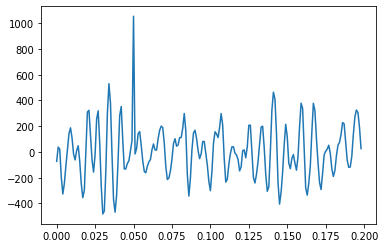

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/womue/s2.csv")
#time values:
t = np.array(df['x'])
#actual data:
sig = np.array(df['y'])

nt = t.shape[0]
dt = t[1]-t[0]

#Continue here...
fig, ax = plt.subplots()
ax.plot(t,sig)

sdiff = (sig[1:] - sig[:-1])/dt

fig, ax = plt.subplots()
ax.plot(t[:-1],sdiff)

#jump occurs at 0.05s

Jump occurs at t = 0.05s.

3(b)(i): If the threshold is too low, other peaks within the dataset will be registered.

(ii): If the threshold is too high, it will miss true jumps.

# Q4

4(a) Nonlinearity enables complexity within the network. In a network many nonlinear functions are combined together enabling arbitrarily complex functions to be captured. Conversely with linear functions, the output must always remain linear.

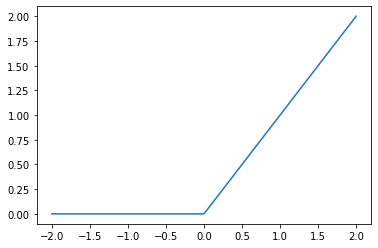

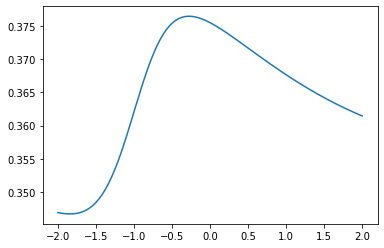

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
  xo = np.copy(x)
  xo[x < 0] = 0
  return xo

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.linspace(-2, 2, 200)
fig, ax = plt.subplots()
ax.plot(x,relu(x))


x1 = np.linspace(-2, 2, 200)

y1 = sigmoid(x1*4 + 4)
y2 = sigmoid(x1*(-0.8) - 0.1)

z1 = sigmoid(y1*0.2 + y2*(0.2) - 0.8)

#fig, ax = plt.subplots()
#ax.plot(x1,y1)
#fig, ax = plt.subplots()
#ax.plot(x1,y2)

fig, ax = plt.subplots()
ax.plot(x1,z1)

# Q5

(a) Type is a non-metric parameter (it has no concept of 'closeness'). Decision tree methods (inc. random forests) work with non-metric methods.

(b) Since the type parameter has effectively been removed, the problem becomes a metric-based one since all the other parameters are metric. Therefore other methods could be used if preferred.

# Q6

In [6]:
#(a)
#3 dimensions, so 3 principal components. Find third.
p1 = np.array((2/3,1/3,2/3))
p2 = np.array((1/3,2/3,-2/3))

#third one is orthogonal, so can be found with cross product
p3 = np.cross(p1,p2)
#also p1 and p2 will be unit length, so p3 must be too.
print(p3)

#(b)
x = np.array((3,2,1))
#just use dot products here - works since orthogonal unit vectors
w1 = np.dot(p1,x)
w2 = np.dot(p2,x)
w3 = np.dot(p3,x)
#NB should not use a matrix inversion here - orthogonality means this is unnecessary
#(and this would lose marks as described in the question)
print(w1, w2, w3)

#as a quick sanity check can do this:
#print(w1*p1+w2*p2+w3*p3)


[-0.66666667  0.66666667  0.33333333]
3.333333333333333 1.6666666666666665 -0.3333333333333334


# Q7

(a) (i) A small window captures the fine details and is accurate in space.

(ii) A large window averages more samples so gives more accurate probability across the range.

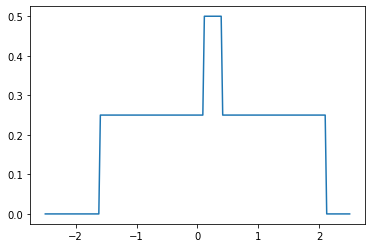

In [48]:
#(b)
x = np.linspace(-2.5, 2.5,200)
p = np.zeros(x.shape)
p[np.abs(x-(-0.6)) < 1] = p[np.abs(x-(-0.6)) < 1] + 1/2/2
p[np.abs(x-(1.1)) < 1] = p[np.abs(x-(1.1)) < 1] + 1/2/2

fig, ax = plt.subplots()
ax.plot(x,p)

0.56


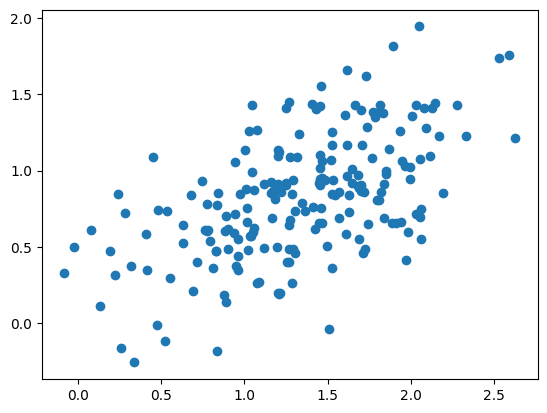

In [4]:
#(c)

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/womue/s3.csv")
#time values:
x1 = np.array(df['x1'])
#actual data:
x2 = np.array(df['x2'])

fig, ax = plt.subplots()
ax.scatter(x1, x2)

#total number of points
n_total = x1.shape[0]

#Need all points 0.75 < x1 < 1.25 and 0.25 < x2 < 0.75.
n_wind = np.count_nonzero(
    np.logical_and(
        np.logical_and(0.75 < x1, x1 < 1.25), 
        np.logical_and(0.25 < x2, x2 < 0.75) 
        )
    )
#print(n_total, n_wind)

p = n_wind/n_total / (0.5)**2 

print(p)